# Quantum Machine Learning (QML)

- #### Hands-on Experiential Learning <font color="red">for the Software Engineer</font>

![QML-Banner](img/QML-Banner3.png "QML-Banner")

<BR>
    
<font color="red">**Notice**</font>: All materials herein were <font color="red">**curated**</font> by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 


- Software engineers in the Quantum Computing space need to know how QC solves Machine Learning Problems in context.
- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>** - we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.

> ### High Level Agenda (<font color="red">*major sections*</font>): - quantum machine learning for the software engineer.
1. <font color="blue">*Quantum Enhanced Support Vector Machine*</font>
2. <font color="blue">*Quantum Natural Gradient*</font>
3. <font color="blue">*Quantum Embeddings and Metric Learning*</font>





# <font color="red">Developmental Detour</font>:  <font color="blue">What is QML?</font> 


![QML-BigInfographic](img/QML-BigInfographic.png "QML-BigInfographic")

<BR>
<BR>

![QML_types](img/QML_types.png "QML_types")

# <font color="red">QML</font>:  <font color="blue">Examples and Case Studies</font> 


## QISKIT: <font color="blue">Quantum Enhanced Support Vector Machine</font>  

> **<font color="red">Quantum Advantage</font>:** - The Classical SVM algorithm **(a)** doesn't scale well with large dataset / high dimmensional input space, and **(b)** finding the hyperplane that separates the data clusters is difficult. 
- The Quantum SVM algorithm is more efficient at addressing both of these problems.
-  Implementing SVMs using quantum algorithms can result in significant speedup over the classical implementations, potentially bringing the originally polynomial complexity down to logarithmic scale in select cases.

<BR>

> ### 2D Feature Space
- Not linearly seperable.

![SVM-Transform2D](img/SVM-Transform2D.png "SVM-Transform2D")

<BR>

> ### 3D Feature Space (after transform)
- Often one-dimensional dataset is not linearly separable, however, when embedding them in the two-dimensional space with the a transform function, the datas become again linearly separable.

![SVM-Transform3D](img/SVM-transform3D.png "SVM-Transform3D")

<BR>

> ### 2D->3D Feature Space (for intuition)
![feature-space](img/feature-space.png "feature-space")

<BR>

> ### High Dimmensional Space
![HighDimmensionPlot](img/HighDimmensionPlot.png "HighDimmensionPlot")

## <font color="blue">Qiskit Implementations</font>  

## <font color="red">Breast Cancer dataset - Classical approach</font>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


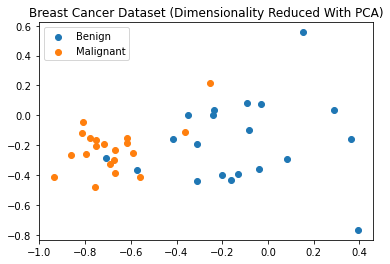

In [2]:
import numpy as np
from dataset import breast_cancer
from sklearn.datasets.samples_generator import make_blobs
from qiskit.aqua.utils import split_dataset_to_data_and_labels 
from sklearn import svm
from utils import svm_utils 
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

n = 2 # number of principal components kept
training_dataset_size = 20
testing_dataset_size = 10

sample_Total, training_input, test_input, class_labels = breast_cancer(training_dataset_size, testing_dataset_size, n)

data_train, _ = split_dataset_to_data_and_labels(training_input)
data_test, _ = split_dataset_to_data_and_labels(test_input)



> There two types of data that can be classified by these algorithms: **linearly separable** datasets and **non-linearly separable** datasets.

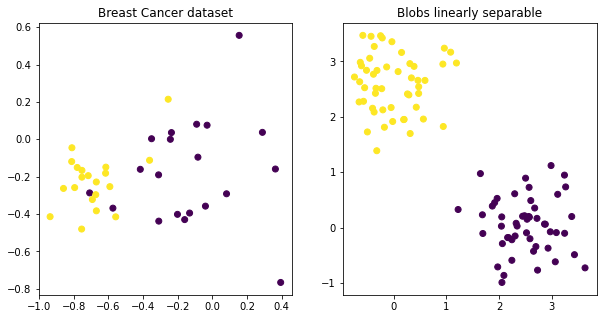

In [3]:
# We use the function of scikit learn to generate linearly separable blobs
centers = [(2.5,0),(0,2.5)]
x, y = make_blobs(n_samples=100, centers=centers, n_features=2,random_state=0,cluster_std=0.5)


fig,ax=plt.subplots(1,2,figsize=(10,5))


ax[0].scatter(data_train[0][:,0],data_train[0][:,1],c=data_train[1])
ax[0].set_title('Breast Cancer dataset');

ax[1].scatter(x[:,0],x[:,1],c=y)
ax[1].set_title('Blobs linearly separable');

> Implement the both the linear and kernel SVM algorihms for the breast cancer dataset.

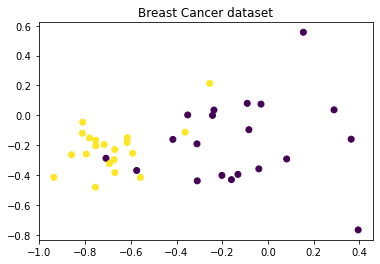

In [4]:
plt.scatter(data_train[0][:,0],data_train[0][:,1],c=data_train[1])
plt.title('Breast Cancer dataset');

> Define a **linear SVM classifier** and train it on the data set.

In [5]:
model= svm.LinearSVC()
model.fit(data_train[0], data_train[1])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

> The background indicates the decision function for the SVM algorithm.

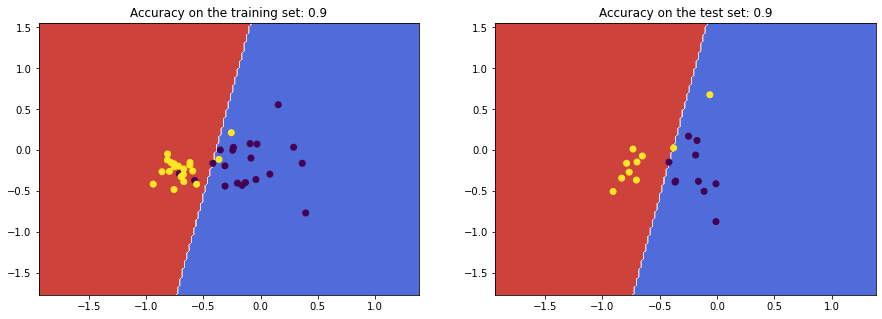

In [6]:
accuracy_train = model.score(data_train[0], data_train[1])
accuracy_test = model.score(data_test[0], data_test[1])


X0, X1 = data_train[0][:, 0], data_train[0][:, 1]
xx, yy = svm_utils.make_meshgrid(X0, X1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
ax[0].scatter(data_train[0][:,0], data_train[0][:,1], c=data_train[1])
ax[0].set_title('Accuracy on the training set: '+str(accuracy_train));

ax[1].contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
ax[1].scatter(data_test[0][:,0], data_test[0][:,1], c=data_test[1])
ax[1].set_title('Accuracy on the test set: '+str(accuracy_test));

> Implement a **SVM with gaussian (non-linear)** kernel

- Often one-dimensional dataset is not linearly separable, however, when embedding them in the two-dimensional space with the a transform function, the datas become again linearly separable.

In [7]:
clf = svm.SVC(gamma = 'scale')
clf.fit(data_train[0], data_train[1]);

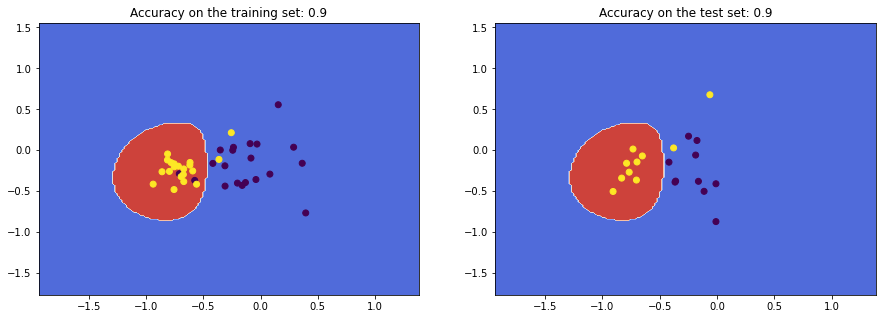

In [8]:
accuracy_train = clf.score(data_train[0], data_train[1])
accuracy_test = clf.score(data_test[0], data_test[1])


X0, X1 = data_train[0][:, 0], data_train[0][:, 1]
xx, yy = svm_utils.make_meshgrid(X0, X1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
ax[0].scatter(data_train[0][:,0], data_train[0][:,1], c=data_train[1])
ax[0].set_title('Accuracy on the training set: '+str(accuracy_train));

ax[1].contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
ax[1].scatter(data_test[0][:,0], data_test[0][:,1], c=data_test[1])
ax[1].set_title('Accuracy on the test set: '+str(accuracy_test));

## <font color="red">Breast Cancer dataset - Quantum approach</font>

### Quantum Classification

- The idea of a classical SVM is we have a set of points that are in either one group or another and we want to find a line that separates these two groups. This line can be linear, but it can also be much more complex (non-linear), which can be achieved by the use of Kernels.



In [11]:
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
feature_map = SecondOrderExpansion(feature_dimension=2, depth=1)

#### Print the feature map circuit

To print the feature map circuit we define an arbitrary vector `x` that we want to encode and construct the circuit for this datapoint.

In [15]:
import numpy as np

x = np.array([0.6, 0.3])

# Standard Printing
print(feature_map.construct_circuit(x))

# Pretty Printing
# feature_map.construct_circuit(x).draw(output="mpl")

     ┌──────────┐┌──────────────┐┌──────────────┐┌──────────────┐
q_0: ┤ U2(0,pi) ├┤0             ├┤0             ├┤0             ├
     ├──────────┤│  Evolution^1 ││  Evolution^1 ││  Evolution^1 │
q_1: ┤ U2(0,pi) ├┤1             ├┤1             ├┤1             ├
     └──────────┘└──────────────┘└──────────────┘└──────────────┘


### QSVM Algorithm

- Qiskit aqua also provides a pre-defined function to train the whole QSVM. Where we only have to provide the feature map, a training and a test set and Qiskit will do all the work for us.

- Apart from finding the quantum Kernel the QSVM algorithm does only classical optimization. In the end there is no difference to the classical SVM, except that the Kernels are coming from a quantum distribution.

In [16]:
from qiskit.aqua.algorithms import QSVM

qsvm = QSVM(feature_map, training_input, test_input)

#### Run QSVM

Define where we would like to run this algorithm - this one will run it on a local QASM Simulator.

In [19]:
# from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua import QuantumInstance
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result = qsvm.run(quantum_instance)

NameError: The CVXPY package is required to use the optimize_svm() function. You can install it with 'pip install qiskit-aqua[cvx]'.

### Analyze output

`results` is a dictionary that contains elements like the kernel matrix, the label predictions and also the classical weights of the QSVM.

#### The kernel matrix for the training

Since the training set contains 40 elements, the kernel matrix has dimension 40x40

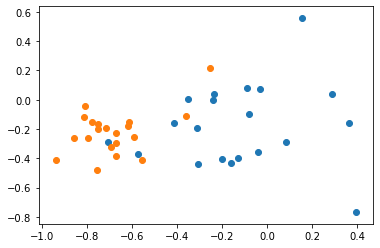

size training set: 40
Matrix dimension: (40, 40)


In [24]:
plt.scatter(training_input['Benign'][:,0], training_input['Benign'][:,1])
plt.scatter(training_input['Malignant'][:,0], training_input['Malignant'][:,1])

plt.show()

length_data = len(training_input['Benign']) + len(training_input['Malignant'])

print("size training set: {}".format(length_data))
print("Matrix dimension: {}".format(result['kernel_matrix_training'].shape))

> The success ratio shows how accurate the QSVM predicts the labels

In [25]:
print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  0.9


In [26]:
test_set = np.concatenate((test_input['Benign'], test_input['Malignant']))
y_test = qsvm.predict(test_set, quantum_instance)

> Plot the results. The **first plot** shows the **label predictions** of the QSVM, and the **second plot** shows the **test labels**.

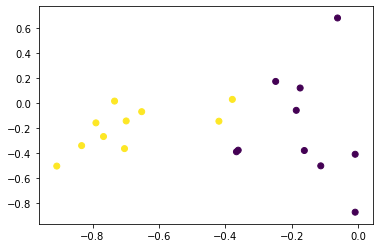

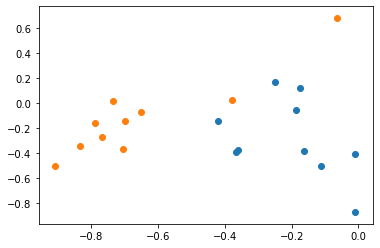

In [27]:
plt.scatter(test_set[:, 0], test_set[:,1], c=y_test)
plt.show()

plt.scatter(test_input['Benign'][:,0], test_input['Benign'][:,1])
plt.scatter(test_input['Malignant'][:,0], test_input['Malignant'][:,1])
plt.show()

## PENNYLANE: <font color="blue">Quantum Natural Gradient</font>  
- https://pennylane.ai/qml/demos/tutorial_quantum_natural_gradient.html

> **<font color="red">Quantum Advantage</font>:** - The Classical Gradient Descent method of training deep learning models is susceptible to the problem of "becoming stuck in local minima". This continues when Gradient Descent is used to train various quantum machine learning models.


Gradient Descent (the same method used to train deep learning models) is the methodology used to train many successful algorithms (variational: VQE, QAOA, QNN) on quantum hardware - however, one issue has surfaced indigenous to gradient descent - how do we choose the **optimal step size** for these variational quantum algorithms to ensure successful and efficient optimization and help avoid optimization becoming stuck in local minima? This is a non trivial concern.

It would be better to avoid gradient descent in the parameter space altogether. If one instead considered the optimization problem as a **probability distribution** of possible output values given an input, then **a better approach is to perform the gradient descent in the distribution space**, which is **dimensionless and invariant** with respect to the parametrization. 

As a result, each optimization step will **<font color="red">always</font>** choose the optimum step-size for every parameter, regardless of the parametrization.

- Example: As opposed to **classical computation**, which **requires <font color="red">six</font> different** quantum evaluations, the **Quantum Calculation** PennyLane Fubini-Study metric tensor implementation only **requires <font color="red">two</font>** quantum evaluations, one per layer.




<BR>

> ### <font color="blue">Classical Approach:</font> Gradient Descent Problem
![GradientDescentPlot](img/GradientDescentPlot.png "GradientDescentPlot")

<BR>

> ### <font color="blue">Quantum Approach:</font> Distribution Space Descent Solution
![DistributionSpaceDescentPlot](img/DistributionSpaceDescentPlot.png "DistributionSpaceDescentPlot")

<BR>

> ### <font color="blue">Quantum vs Classical Comparison</font>
![QuantumNaturalGradient](img/QuantumNaturalGradient.png "QuantumNaturalGradient")

## NOTE: <font color="blue">The purpose of this code base</font> 

> This code base is provided simply to expose the reader to working Quantum Machine Learning code that illustrates the different behaviors of **Classical** Gradient Descent and **Quantum** Gradient Descent, particularly computational speedups gained in the computation of the different cost functions **("parameter" space vs "distribution" space)**.

- It's not provided to teach the reader QML or Pennylane - that is beyond the scope of this exercise.



In [ ]:
import numpy as np

import pennylane as qml
from pennylane import expval, var

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def circuit(params):
    # |psi_0>: state preparation
    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 7, wires=2)

    # V0(theta0, theta1): Parametrized layer 0
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)

    # W1: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    # V_1(theta2, theta3): Parametrized layer 1
    qml.RY(params[2], wires=1)
    qml.RX(params[3], wires=2)

    # W2: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    return qml.expval(qml.PauliY(0))


params = np.array([0.432, -0.123, 0.543, 0.233])

g0 = np.zeros([2, 2])


def layer0_subcircuit(params):
    """This function contains all gates that
    precede parametrized layer 0"""
    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 7, wires=2)
    
    
@qml.qnode(dev)
def layer0_diag(params):
    layer0_subcircuit(params)
    return var(qml.PauliZ(0)), var(qml.PauliZ(1))

# calculate the diagonal terms
varK0, varK1 = layer0_diag(params)
g0[0, 0] = varK0 / 4
g0[1, 1] = varK1 / 4


@qml.qnode(dev)
def layer0_off_diag_single(params):
    layer0_subcircuit(params)
    return expval(qml.PauliZ(0)), expval(qml.PauliZ(1))


@qml.qnode(dev)
def layer0_off_diag_double(params):
    layer0_subcircuit(params)
    ZZ = np.kron(np.diag([1, -1]), np.diag([1, -1]))
    return expval(qml.Hermitian(ZZ, wires=[0, 1]))


# calculate the off-diagonal terms
exK0, exK1 = layer0_off_diag_single(params)
exK0K1 = layer0_off_diag_double(params)

g0[0, 1] = (exK0K1 - exK0 * exK1) / 4
g0[1, 0] = (exK0K1 - exK0 * exK1) / 4


g1 = np.zeros([2, 2])

def layer1_subcircuit(params):
    """This function contains all gates that
    precede parametrized layer 1"""
    # |psi_0>: state preparation
    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 7, wires=2)

    # V0(theta0, theta1): Parametrized layer 0
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)

    # W1: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    
    
@qml.qnode(dev)
def layer1_diag(params):
    layer1_subcircuit(params)
    return var(qml.PauliY(1)), var(qml.PauliX(2))


@qml.qnode(dev)
def layer1_off_diag_single(params):
    layer1_subcircuit(params)
    return expval(qml.PauliY(1)), expval(qml.PauliX(2))


@qml.qnode(dev)
def layer1_off_diag_double(params):
    layer1_subcircuit(params)
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    YX = np.kron(Y, X)
    return expval(qml.Hermitian(YX, wires=[1, 2]))


# calculate the off-diagonal terms
exK0, exK1 = layer1_off_diag_single(params)
exK0K1 = layer1_off_diag_double(params)

g1[0, 1] = (exK0K1 - exK0 * exK1) / 4
g1[1, 0] = g1[0, 1]


from scipy.linalg import block_diag

g = block_diag(g0, g1)

# print(np.round(g, 8))
# print(np.round(circuit.metric_tensor([params]), 8))
# print(circuit.metric_tensor([params], diag_approx=True))

steps = 200
init_params = np.array([0.432, -0.123, 0.543, 0.233])


# Gradient descent cost FN
gd_cost = []
opt = qml.GradientDescentOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    gd_cost.append(circuit(theta))
    
    
# Quantum Natural descent cost FN
qng_cost = []
opt = qml.QNGOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    qng_cost.append(circuit(theta))
    

In [ ]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
plt.plot(gd_cost, "b", label="Vanilla gradient descent")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

## PENNYLANE: <font color="blue">Quantum Embeddings and Metric Learning</font>  
- https://pennylane.ai/qml/demos/tutorial_embeddings_metric_learning.html
- (Inspiration): https://pennylane.ai/qml/demos/tutorial_quantum_transfer_learning.html

> **<font color="red">Quantum Advantage</font>:** A simple metric in Hilbert space corresponds to a "potentially" much more complex metric in the original data space, therefore simple decision boundary can translate to a **non-trivial decision boundary** in the original space of the data.





<BR>

> **<font color="blue">Quantum metric learning</font>** trains a quantum embedding—for example, a quantum circuit that encodes classical data into quantum states to separate different classes of data in the Hilbert space of the quantum system.

![Quantum_Embeddings-HilbertSpace](img/Quantum_Embeddings-HilbertSpace.png "Quantum_Embeddings-HilbertSpace")

<BR>

> A new data sample (red dot) gets mapped into Hilbert space via the same embedding, and a special measurement compares it to the two embedded classes. The decision boundary of the measurement in quantum state space is nearly linear (red dashed line).

![Quantum_Embeddings-Classifications](img/Quantum_Embeddings-Classifications.png "Quantum_Embeddings-Classifications")

<BR>

> Since a simple metric in Hilbert space corresponds to a potentially much more complex metric in the original data space, the simple decision boundary can translate to a non-trivial decision boundary in the original space of the data.

![Quantum_Embeddings-ComplexMetric](img/Quantum_Embeddings-ComplexMetric.png "Quantum_Embeddings-ComplexMetric")


>  This code implements a trainable, hybrid classical-quantum embedding implemented by a partially pre-trained classical neural network, followed by a parametrized quantum circuit that implements the quantum feature map.

![Quantum_Embedding-Circuit](img/Quantum_Embedding-Circuit.png "Quantum_Embedding-Circuit")



## NOTE: <font color="blue">The purpose of this code base</font> 

> This code base is provided simply to expose the reader to working Quantum Machine Learning code that illustrates the different behaviors of Quantum embeddings and metric learning - in particular how to show how a **simple metric in hilbert space (on the bloch sphere)** can translate into a **non-trivial decision boundary** in the original space of the data.

- It's not provided to teach the reader QML or Pennylane - that is beyond the scope of this exercise.

## Data:

>  The Image Classifier (via transfer learning) is for Ants and Bees - binary supervised learning problem.

![Quantum_Embedding-Ants-Bees](img/Quantum_Embedding-Ants-Bees.png "Quantum_Embedding-Ants-Bees")


- For convenience, instead of coding up the classical neural network, we load pre-extracted feature vectors of the images. These were created by resizing, cropping and normalizing the images, and passing them through PyTorch’s pretrained ResNet 512 (that is, without the final linear layer).

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pennylane as qml
from pennylane import numpy as np
from pennylane import RX, RY, RZ, CNOT

def feature_encoding_hamiltonian(features, wires):

    for idx, w in enumerate(wires):
        RX(features[idx], wires=w)

def ising_hamiltonian(weights, wires, l):

        # ZZ coupling
        CNOT(wires=wires)
        RZ(2 * weights[l, 0], wires=wires[0])
        CNOT(wires=wires)
        # local fields
        for idx, w in enumerate(wires):
            RY(weights[l, idx + 1], wires=w)

def QAOAEmbedding(features, weights, wires):

    repeat = len(weights)
    for l in range(repeat):
        # apply alternating Hamiltonians
        feature_encoding_hamiltonian(features, wires)
        ising_hamiltonian(weights, wires, l)
    # repeat the feature encoding once more at the end
    feature_encoding_hamiltonian(features, wires)
    
    
# For convenience, instead of coding up the classical neural network, 
# we load pre-extracted feature vectors of the images. These were created 
# by resizing, cropping and normalizing the images, and passing them through 
# PyTorch’s pretrained ResNet 512 (that is, without the final linear layer).
    
X = np.loadtxt("data/embedding_metric_learning/X_antbees.txt", ndmin=2)  #1  pre-extracted inputs
Y = np.loadtxt("data/embedding_metric_learning/Y_antbees.txt")  # labels
X_val = np.loadtxt(
    "data/embedding_metric_learning/X_antbees_test.txt", ndmin=2
)  # pre-extracted validation inputs
Y_val = np.loadtxt("data/embedding_metric_learning/Y_antbees_test.txt")  # validation labels

# split data into two classes
A = X[Y == -1]
B = X[Y == 1]
A_val = X_val[Y_val == -1]
B_val = X_val[Y_val == 1]

# Print the respective Data's shape.
#
print(A.shape)
print(B.shape)

(83, 512)
(70, 512)


## Cost:

- The distance metric underlying the notion of ‘separation’ is the ℓ2  or Hilbert-Schmidt norm.

In [18]:
n_features = 2
n_qubits = 2 * n_features + 1

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def swap_test(q_weights, x1, x2):

    # load the two inputs into two different registers
    QAOAEmbedding(features=x1, weights=q_weights, wires=[1, 2])
    QAOAEmbedding(features=x2, weights=q_weights, wires=[3, 4])

    # perform the SWAP test
    qml.Hadamard(wires=0)
    for k in range(n_features):
        qml.CSWAP(wires=[0, k + 1, 2 + k + 1])
    qml.Hadamard(wires=0)

    return qml.expval(qml.PauliZ(0))

def overlaps(weights, X1=None, X2=None):

    linear_layer = weights[0]
    q_weights = weights[1]

    overlap = 0
    for x1 in X1:
        for x2 in X2:
            # multiply the inputs with the linear layer weight matrix
            w_x1 = linear_layer @ x1
            w_x2 = linear_layer @ x2
            # overlap of embedded intermediate features
            overlap += swap_test(q_weights, w_x1, w_x2)

    mean_overlap = overlap / (len(X1) * len(X2))
    return mean_overlap


def cost(weights, A=None, B=None):

    aa = overlaps(weights, X1=A, X2=A)
    bb = overlaps(weights, X1=B, X2=B)
    ab = overlaps(weights, X1=A, X2=B)

    d_hs = -2 * ab + (aa + bb)

    return 1 - 0.5 * d_hs



## Optimization:


In [19]:
# generate initial parameters for circuit
init_pars_quantum = np.random.normal(loc=0, scale=0.1, size=(4, 3))

# generate initial parameters for linear layer
init_pars_classical = np.random.normal(loc=0, scale=0.1, size=(2, 512))

init_pars = [init_pars_classical, init_pars_quantum]

## Train:

- Training is sensitive to the hyperparameters such as the batch size, initial parameters and optimizer used.

In [20]:
optimizer = qml.RMSPropOptimizer(stepsize=0.01)
batch_size = 5
pars = init_pars

for i in range(2):

    # Sample a batch of training inputs from each class
    selectA = np.random.choice(range(len(A)), size=(batch_size,), replace=True)
    selectB = np.random.choice(range(len(B)), size=(batch_size,), replace=True)
    A_batch = [A[s] for s in selectA]
    B_batch = [B[s] for s in selectB]

    # Walk one optimization step
    pars = optimizer.step(lambda w: cost(w, A=A_batch, B=B_batch), pars)
    print("Step", i, "done.")

    # Print the validation cost every 10 steps
    if i % 5 == 0 and i != 0:
        cst = cost(pars, A=A_val, B=B_val)
        print("Cost on validation set {:2f}".format(cst))

Step 0 done.
Step 1 done.


In [21]:
pretrained_pars = np.load("data/embedding_metric_learning/pretrained_parameters.npy", allow_pickle=True)

print(pretrained_pars)

[array([[ 0.07892546,  0.18963997,  0.01267011, ..., -0.41917757,
         0.13794201, -0.31620719],
       [-0.49709026, -0.49160803, -0.16817771, ...,  0.35410417,
        -0.28687695,  0.25804757]])
 array([[ 1.28247918e-03, -2.53456415e-05, -2.53456415e-05],
       [ 1.55648560e-06,  1.65446338e-02,  1.55648553e-06],
       [ 8.12333186e-06, -1.99865981e-04,  6.71177010e-03],
       [-2.92851167e-03,  8.12333185e-06,  1.09834400e-03]])]


## Analysis:

- A useful way to visualize the distance of data points is to plot a Gram matrix of the overlaps of different feature states.

In [22]:
select = 10

In [23]:
cost_train = cost(pretrained_pars, A=A[:select], B=B[:select])
cost_val = cost(pretrained_pars, A=A_val[:select], B=B_val[:select])

print("Cost for pretrained parameters on training set:", cost_train)
print("Cost for pretrained parameters on validation set:", cost_val)

Cost for pretrained parameters on training set: 9.496280768361842e-05
Cost for pretrained parameters on validation set: 9.496280768361842e-05


## Analysis:

- Before training, the separation between the classes is not recognizable in the Gram matrix.


> Generated Plot (below) in grayscale.

![Gram_Matrix-NoSeperation](img/Gram_Matrix-NoSeperation.png "Gram_Matrix-NoSeperation")

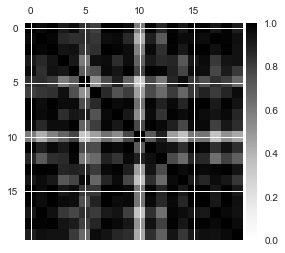

In [24]:
A_B = np.r_[A[:select], B[:select]]

gram_before = [[overlaps(init_pars, X1=[x1], X2=[x2]) for x1 in A_B] for x2 in A_B]

ax = plt.subplot(111)
im = ax.matshow(gram_before, vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()


## Analysis:

- After training, the gram matrix clearly separates the two classes.


> Generated Plot (below) in grayscale.

![Gram_Matrix-Separation](img/Gram_Matrix-Separation.png "Gram_Matrix-Separation")

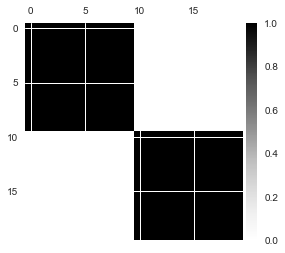

In [23]:
gram_after = [[overlaps(pretrained_pars, X1=[x1], X2=[x2]) for x1 in A_B] for x2 in A_B]

ax = plt.subplot(111)
im = ax.matshow(gram_after, vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

## Analysis:

- We can also visualize the “intermediate layer” of 2-dimensional vectors just before feeding them into the quantum circuit. Before training the classes are arbitrarily intermixed.


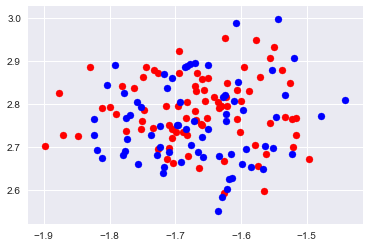

In [25]:
for a in A:
    intermediate_a = init_pars[0] @ a
    plt.scatter(intermediate_a[:][0], intermediate_a[:][1], c="red")

for b in B:
    intermediate_b = init_pars[0] @ b
    plt.scatter(intermediate_b[:][0], intermediate_b[:][1], c="blue")
    
    

## Analysis:

- After training, the linear layer learned to arrange the intermediate feature vectors on a periodic grid.


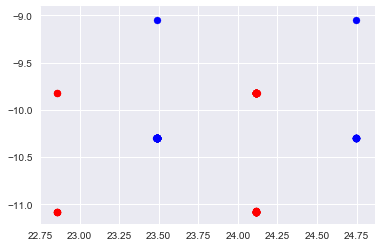

In [26]:
for a in A:
    intermediate_a = pretrained_pars[0] @ a
    plt.scatter(intermediate_a[:][0], intermediate_a[:][1], c="red")

for b in B:
    intermediate_b = pretrained_pars[0] @ b
    plt.scatter(intermediate_b[:][0], intermediate_b[:][1], c="blue")
    

## Classification:

- Let us consider a picture of an ant from the validation set (assuming our model never saw it during training)

<BR>

![Gram_Matrix-AntPicture](img/Gram_Matrix-AntPicture.png "Gram_Matrix-AntPicture")

After passing it through the classical neural network (excluding the final linear layer), the 512-dimensional feature vector is given by **A_val[0]** .

In [27]:
x_new = A_val[0]

print(x_new.shape)

(512,)


We compare the new input with randomly selected samples. The more samples used, the smaller the variance in the prediction.

- Since the result is **negative**, the new data point is (*correctly*) predicted to be a **picture of an ant**, which was the class with **-1 labels**.

In [29]:
n_samples = 200

prediction = 0
for s in range(n_samples):

    # select a random sample from the training set
    sample_index = np.random.choice(len(X))
    x = X[sample_index]
    y = Y[sample_index]

    # compute the overlap between training sample and new input
    overlap = overlaps(pretrained_pars, X1=[x], X2=[x_new])

    # add the label weighed by the overlap to the prediction
    prediction += y * overlap

# normalize prediction
prediction = prediction / n_samples
print(prediction)

-0.5549821301602619


![the-end](img/the-end.png "the-end")